In [748]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import sys

In [749]:
np.random.seed(1234)
m = 500    #500
n = 100    #100
A = np.random.randint(low=-100, high=-50, size=(n, m))
b = np.random.randint(low=500, high=1000, size=m) 
c = np.random.randint(low=-3, high=1, size=n)

ITER_MAX = 50
EPS = sys.float_info.epsilon

Note: b-ax > 0 as log0 is not defined

In [750]:
def func(x, A, b, c):
    """
    Function Signature
    ------------------
    x - current function value
    A,b,c - input constants
    return f(x)
    """
    fx = np.dot(c.T, x) - np.sum(np.log10((b - np.dot(A.T, x))))
    return fx

In [751]:
def grad(x, A, b, c):
    """
    Function Signature
    ------------------
    x - current function value
    A,b,c - input constants
    return deravative f(x)
    """
    gradient = A.dot(1.0/(b - A.T.dot(x))) + c
    return gradient

BackTrack Line Serarch 


The value of "t" or the step length decreases by a factor Beta while the loop is true. Terminating condition is satified when "gold1" <= "gold2"

In [752]:
def funcback(d,x,A, b, c,ALPHA = 0.1,BETA = 0.5):
    """
    Function Signature
    ------------------
    d - descent direction
    x - current function value
    A,b,c - input constants
    alpha - A value between 0.01 to 0.3
    beta - A value betwen 0.1 to 0.8
    T_STEP = 1 (Initial condition)
    return step-length
    """
    T_STEP = 1
    while True:
        gold1 = func(x +t * d, A, b, c)
        gold2 = func(x, A, b, c)  + ALPHA * T_STEP * np.dot(grad(x, A, b, c).T , (d))   
        T_STEP = T_STEP * BETA
        if gold1 <= gold2:
            break    
    return T_STEP

Stopping Condition is satisfied when ||d|| is less than or equal to epsilon. 

In [753]:
np.random.seed(1234)
x = np.random.randint(low=1, high=50, size=n)
plotarray=[]
A = np.random.randint(low=-100, high=-50, size=(n, m))
b = np.random.randint(low=500, high=1000, size=m) 
c = np.random.randint(low=-3, high=1, size=n)
for i in range(0,ITER_MAX):
    plotarray.append(np.ravel(func(x, A, b, c)))
    d = - grad(x, A, b, c)
    T_STEP = funcback(d,x, A, b, c)
    x = x + T_STEP * d
    if np.linalg.norm(d) <= EPS:
        break


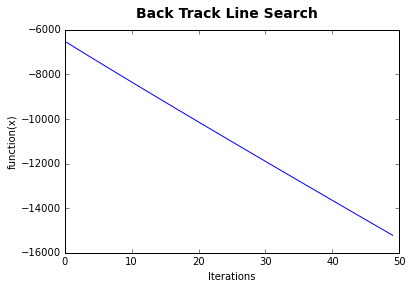

In [754]:
%matplotlib inline
plt.suptitle('Back Track Line Search', fontsize=14, fontweight='bold')
plt.ylabel('function(x)')
plt.xlabel('Iterations')

plt.plot(np.array(range(0, ITER_MAX)),plotarray  ,'-', color="blue", alpha=1,linewidth=1.0, linestyle="-")

Exact Line Search

In [755]:
def funcexact(d,x,A, b, c):
    """
    Function Signature
    ------------------
    d - descent direction
    x - current function value
    A,b,c - input constants
    
    T_STEP = [.0001,.0005,.001,.005,.01,.05,.1,.5,1,1.5] Initial condition
    tempT - dictionary  {T_STEP:f(x+ t*d)}
    return step-length
    """
    T_STEP = np.array([.0001,.0005,.001,.005,.01,.05,.1,.5,1,1.5])
    tempT= {}
    for i in T_STEP:
        intermedaite_x = x + i* d
        tempT[i]=np.ravel(func(intermedaite_x,A, b, c))
          
    return min(tempT, key=lambda k: tempT[k])

In [756]:
np.random.seed(1234)
x = np.random.randint(low=1, high=50, size=n)
plotarray2=[]
for i in range(0,ITER_MAX):
    plotarray2.append(np.ravel(func(x, A, b, c)))
    d = - grad(x, A, b, c)
    T_STEP = funcexact(d,x, A, b, c)
    x = x + T_STEP * d


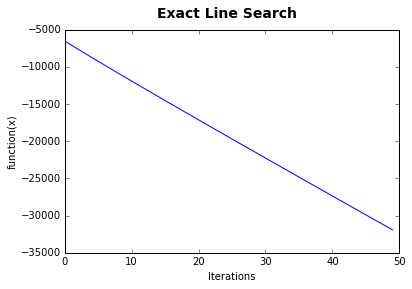

In [757]:
%matplotlib inline
plt.suptitle('Exact Line Search', fontsize=14, fontweight='bold')
plt.ylabel('function(x)')
plt.xlabel('Iterations')

plt.plot(np.array(range(0, ITER_MAX)),plotarray2  ,'-', color="blue", alpha=1,linewidth=1.0, linestyle="-")

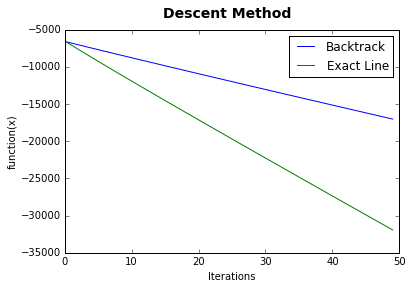

In [758]:
%matplotlib inline

plt.suptitle('Descent Method', fontsize=14, fontweight='bold')
plt.ylabel('function(x)')
plt.xlabel('Iterations')
plt.plot(np.array(range(0, ITER_MAX)), plotarray1, label='Backtrack')
plt.plot(np.array(range(0, ITER_MAX)), plotarray2, label='Exact Line')
plt.legend(loc='upper right')

plt.show()

Using SciPy Optimize

In [726]:

def scipyfunc(x,A,b,c,ITER_MAX):
    """
    Function Signature
    ------------------
    x - current function value
    A,b,c - input constants
    ITER_MAX - Number of Iterations
    func - "f" of the function to be minimised
    fmin_cg -  Use conjugate gradient algorithm to minimise
    return min(f)
    """
    fx = scipy.optimize.fmin_cg(func, x, args=(A,b,c),maxiter=ITER_MAX)
    return fx


In [ ]:
plot = []
for i in range(0,ITER_MAX):
    op = scipyfunc(x,A,b,c,i)
    plot.append(func(op,A, b, c))

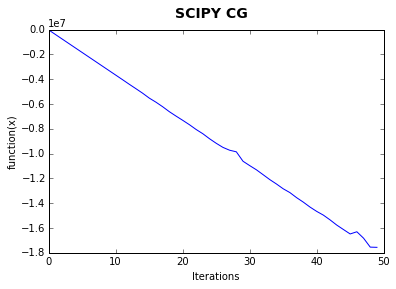

In [759]:
%matplotlib inline
plt.suptitle('SCIPY CG', fontsize=14, fontweight='bold')
plt.ylabel('function(x)')
plt.xlabel('Iterations')
plt.plot(np.array(range(0, ITER_MAX)),plot ,'-', color="blue", alpha=1,linewidth=1.0, linestyle="-")